In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [20]:
tf.__version__

'2.8.2'

In [2]:
from google.colab import drive
drive.mount('/content/dirve/')

Mounted at /content/dirve/


In [3]:
path = 'https://drive.google.com/file/d/1UgXLmtJj_weBQEGXx8dsLhav0-lA8CbK/view?usp=sharing'

In [5]:
import h5py

In [44]:
h5f = h5py.File ('/content/dirve/MyDrive/SVHN_single_grey1.h5')

In [45]:
# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


In [46]:
# Close the file
h5f.close()

In [47]:
# Check the number of images in the training and testing dataset

In [48]:
len(X_train), len(X_test)

(42000, 18000)

## There are 42000 images in the training and 18000 images in the testing 

**Visualizing Images**

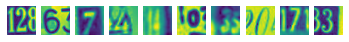

Label for each of the above image : [2 6 7 4 4 0 3 0 7 3]


In [23]:
for i in range(10):
  plt.subplot(1,10, i+1)
  plt.imshow(X_train[i])
  plt.axis ('off')
plt.show()
print('Label for each of the above image : %s'%(y_train[0:10]))

**Data Preparation**

1. Print the shape and the array of pixels for the first image in the training dataset
2. Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs
3. Normalize the train and the test dataset by dividing by 255
4. Print the new shapes of the train and the test dataset
5. One-hot encode the target variable

In [24]:
print('Shape :', X_train[0].shape)

Shape : (32, 32)


In [25]:
print('First image : \n', X_train[0])

First image : 
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [53]:
# Reshaping the dataset to flatten them( from 2D image into 1D array)
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)


In [28]:
# Normalize inputs from 255 to 0-1
X_train = X_train / 255
X_test = X_test /255

In [54]:
# New shape
print('Training set :', X_train.shape, y_train.shape)
print('Test set :', X_test.shape, y_test.shape)

Training set : (42000, 1024) (42000,)
Test set : (18000, 1024) (18000,)


In [31]:
# One-hot encode
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
# No. of classes
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Model Building: build an ANN model**

In [33]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers

In [34]:
# Create model
model1 = Sequential()
model1.add(Dense(64, activation = 'relu', input_shape = (1024,)))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(10, activation = 'softmax'))

In [38]:
# Compile the model
adam = optimizers.Adam(learning_rate = 0.001)
model1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [39]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [56]:
from tensorflow.keras import backend
backend.clear_session()

In [59]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [60]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers

In [66]:
model2 = Sequential()
model2.add(Dense(256, activation = 'relu', input_shape = (1024,)))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation = 'softmax'))

In [67]:
adam = optimizers.Adam(learning_rate = 0.005)
model2.compile(loss = losses.categorical_crossentropy, optimizer = adam, metrics = ['accuracy'])

In [68]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               262400    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_2 (Batc  (None, 32)              